# Data Analysis

Data Normalisation

Principal Components Analysis 

Plotting

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/GSoC2021/Data/Dataset.csv")

In [3]:
dataset.head()

,Experiment,Particle,E1,pt1,eta1,phi1
0,2,j,1069460.0,751597.0,0.858186,-1.842170
1,3,j,676000.0,640429.0,0.330450,0.704554
2,4,j,936707.0,616229.0,0.973383,-1.565920
3,5,j,640313.0,589524.0,0.390749,1.237340
4,6,j,583373.0,545730.0,0.364057,-1.607320


In [4]:
def data_norm(dataset):
    """This function is used for data normalisation: 
    Input: Cleaned dataset that you get after running data_cleaning.py script
    Output: Pandas dataframe with 4 additional columns 
    (E1_Norm, pt1_Norm, eta1_Norm, phi1_Norm)"""
    normalized_data = preprocessing.normalize([dataset.E1, dataset.pt1, dataset.eta1, dataset.phi1])
    dataset["E1_Norm"] = normalized_data[0]
    dataset["pt1_Norm"] = normalized_data[1]
    dataset["eta1_Norm"] = normalized_data[2]
    dataset["phi1_Norm"] = normalized_data[3]
    return dataset

dataset = data_norm(dataset)

In [5]:
dataset.head()

,Experiment,Particle,E1,pt1,eta1,phi1,E1_Norm,pt1_Norm,eta1_Norm,phi1_Norm
0,2,j,1069460.0,751597.0,0.858186,-1.842170,0.011660,0.013896,0.003785,-0.006760
1,3,j,676000.0,640429.0,0.330450,0.704554,0.007370,0.011840,0.001457,0.002585
2,4,j,936707.0,616229.0,0.973383,-1.565920,0.010213,0.011393,0.004293,-0.005746
3,5,j,640313.0,589524.0,0.390749,1.237340,0.006981,0.010899,0.001723,0.004540
4,6,j,583373.0,545730.0,0.364057,-1.607320,0.006360,0.010089,0.001606,-0.005898


Plotting the histograms of 'E1', 'pt1', 'eta1', ‘phi1' after normalisation

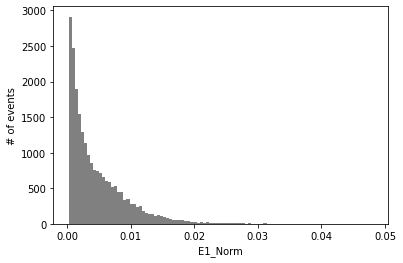

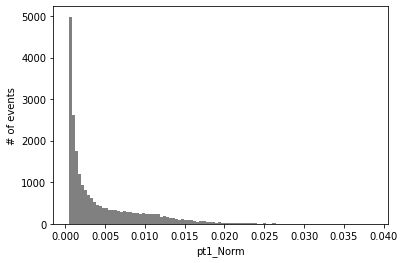

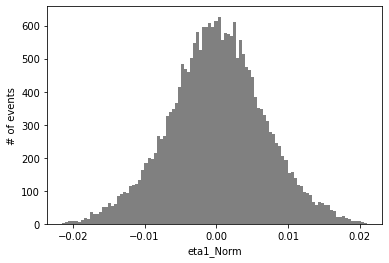

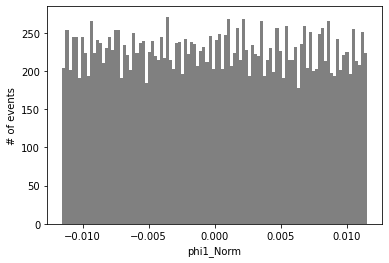

In [6]:
branches=["E1_Norm", "pt1_Norm", "eta1_Norm", "phi1_Norm"]

n_bins = 100

for kk in range(0,4):
    n_hist_data, bin_edges, _ = plt.hist(dataset[branches[kk]], color='gray', label='Input', alpha=1, bins=n_bins)
    plt.xlabel(xlabel=branches[kk])
    plt.ylabel('# of events')
    plt.savefig("fourmomentum_"+branches[kk],dpi=300)
    plt.show()

Calculating the PCA 1, PCA 2 and PCA 3 of normalisation

In [7]:
norm_data = [dataset.E1_Norm, dataset.phi1_Norm, dataset.eta1_Norm, dataset.phi1_Norm]
norm_data = np.array(norm_data)
norm_data = norm_data.transpose()

In [8]:
pca_1 = PCA(n_components=1)
pca1_data = pca_1.fit_transform(norm_data)

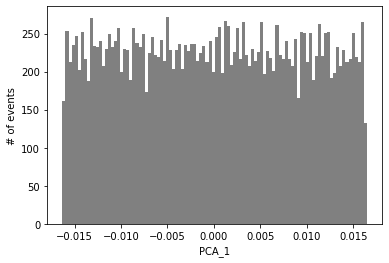

In [9]:
n_bins = 100
n_hist_data, bin_edges, _ = plt.hist(pca1_data, color='gray', label='Input', alpha=1, bins=n_bins)
plt.xlabel(xlabel="PCA_1")
plt.ylabel('# of events')
plt.savefig("fourmomentum_PCA", dpi=300)
plt.show()

In [10]:
pca_2 = PCA(n_components=2)
pca2_data = pca_2.fit_transform(norm_data)

In [11]:
pca2_dataset = pd.DataFrame(pca2_data, columns=["PCA1", "PCA2"])

<Figure size 432x288 with 0 Axes>

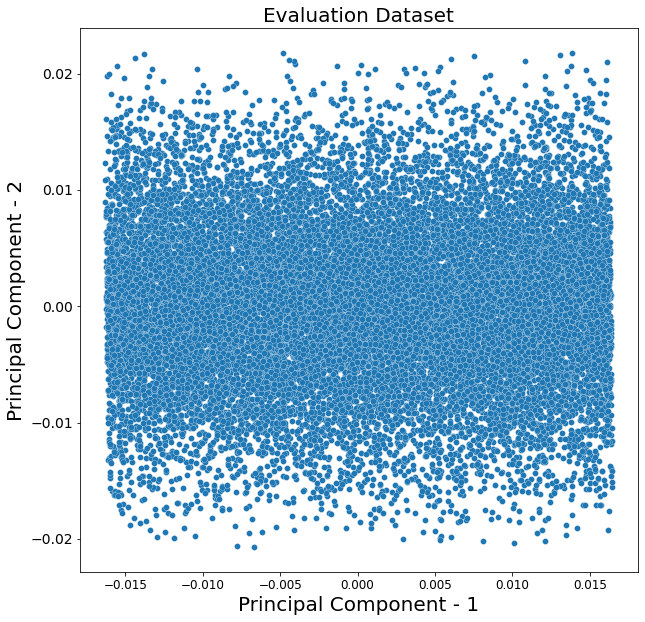

In [12]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Evaluation Dataset",fontsize=20)

plt.scatter(pca2_dataset.PCA1, pca2_dataset.PCA2, edgecolors="w", linewidths=0.25)
plt.savefig("PCA1_PCA2", dpi=300)
plt.show()

In [13]:
pca_3 = PCA(n_components=3)
pca3_data = pca_3.fit_transform(norm_data)

In [14]:
pca3_dataset = pd.DataFrame(pca3_data, columns=["PCA1", "PCA2", "PCA3"])

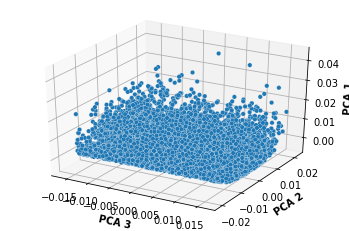

In [15]:
ax = plt.axes(projection ='3d')
x = pca3_dataset.PCA1
y = pca3_dataset.PCA2
z = pca3_dataset.PCA3
ax.scatter(x, y, z, edgecolors="w", linewidths=0.25, alpha=1) 
ax.set_xlabel("PCA 3", weight="bold")
ax.set_ylabel("PCA 2", weight="bold")
ax.set_zlabel("PCA 1", weight="bold")

plt.savefig('PCA1vsPCA2vsPCA3', dpi=300)

Using the predictions dataset coollected after training the autoencoder

In [18]:
predictions = pd.read_csv("/content/Predictions.csv")

In [19]:
predictions

,Unnamed: 0,E1,pt1,eta1,phi1,E1_Pred,pt1_Pred,eta1_Pred,phi1_Pred
0,0,0.004698,0.007766,0.000910,0.000212,0.004718,0.004454,0.000082,-0.000129
1,1,0.012423,0.020291,-0.001188,-0.008808,0.004689,0.004346,0.000035,-0.000005
2,2,0.004631,0.007735,0.000332,0.009278,0.004714,0.004482,0.000092,-0.000150
3,3,0.000343,0.000496,-0.002531,-0.009245,0.004731,0.004431,0.000075,-0.000112
4,4,0.004589,0.000458,0.015544,-0.006304,0.004763,0.004561,0.000140,-0.000296
...,...,...,...,...,...,...,...,...,...
4528,4528,0.000514,0.000717,-0.002782,0.011501,0.004723,0.004502,0.000101,-0.000170
4529,4529,0.017945,0.014815,-0.005942,0.005498,0.004678,0.004375,0.000045,-0.000030
4530,4530,0.002607,0.002799,0.004535,-0.006072,0.004738,0.004479,0.000098,-0.000176
4531,4531,0.002236,0.003167,0.002631,0.003679,0.004731,0.004500,0.000103,-0.000184


In [20]:
valid_data = [predictions.E1, predictions.pt1, predictions.eta1, predictions.phi1]
pred_data = [predictions.E1_Pred, predictions.pt1_Pred, predictions.eta1_Pred, predictions.phi1_Pred]

valid_data = np.array(valid_data)
valid_data = valid_data.transpose()

pred_data = np.array(pred_data)
pred_data = pred_data.transpose()

In [21]:
pca_valid = PCA(n_components=1)
pca_valid_data = pca_valid.fit_transform(valid_data)

pca_pred = PCA(n_components=1)
pca_pred_data = pca_pred.fit_transform(pred_data)

<Figure size 432x288 with 0 Axes>

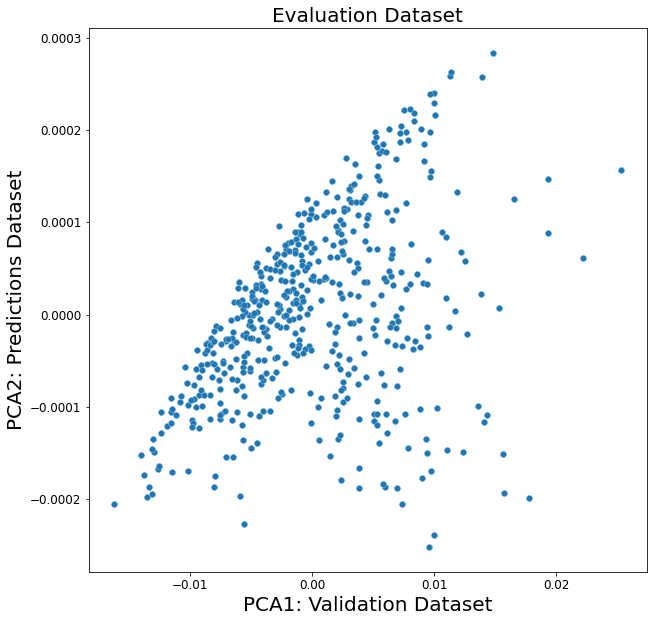

In [22]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('PCA1: Validation Dataset',fontsize=20)
plt.ylabel('PCA2: Predictions Dataset',fontsize=20)
plt.title("Evaluation Dataset",fontsize=20)


plt.scatter(pca_valid_data, pca_pred_data, edgecolors="w", linewidths=0.25)
plt.savefig("Data_vs_Predictions", dpi=300)
plt.show()

In [23]:
# pred_data = [predictions.E1_Pred, predictions.pt1_Pred, predictions.eta1_Pred, predictions.phi1_Pred]
# pred_data = np.array(pred_data)
# pred_data = pred_data.transpose()

# ##
# pca_pred = PCA(n_components=1)
# pca_pred_data = pca_pred.fit_transform(pred_data)


valid_data = [predictions.E1, predictions.pt1, predictions.eta1, predictions.phi1]
valid_data = np.array(valid_data)
valid_data = valid_data.transpose()

##
pca_valid = PCA(n_components=1)
pca_valid_data = pca_valid.fit_transform(valid_data)

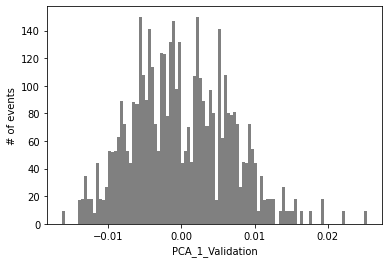

In [24]:
n_bins = 100
n_hist_data, bin_edges, _ = plt.hist(pca_valid_data, color='gray', label='Input', alpha=1, bins=n_bins)
plt.xlabel(xlabel="PCA_1_Validation")
plt.ylabel('# of events')
plt.savefig("fourmomentum_PCA_Validation", dpi=300)
plt.show()

In [25]:
# pred_data = [predictions.E1_Pred, predictions.pt1_Pred, predictions.eta1_Pred, predictions.phi1_Pred]
# pred_data = np.array(pred_data)
# pred_data = pred_data.transpose()

# ##
# pca_pred = PCA(n_components=2)
# pca_pred_data = pca_pred.fit_transform(pred_data)


valid_data = [predictions.E1, predictions.pt1, predictions.eta1, predictions.phi1]
valid_data = np.array(valid_data)
valid_data = valid_data.transpose()

##
pca_valid = PCA(n_components=2)
pca_valid_data = pca_valid.fit_transform(valid_data)

In [26]:
pca2_dataset_valid = pd.DataFrame(pca_valid_data, columns=["PCA1_Validation", "PCA2_Validation"])

<Figure size 432x288 with 0 Axes>

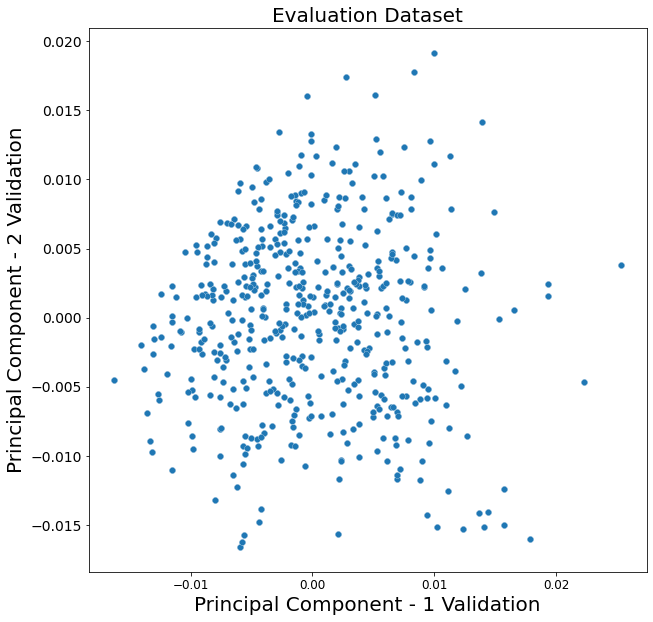

In [27]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1 Validation',fontsize=20)
plt.ylabel('Principal Component - 2 Validation',fontsize=20)
plt.title("Evaluation Dataset",fontsize=20)

plt.scatter(pca2_dataset_valid.PCA1_Validation, pca2_dataset_valid.PCA2_Validation, edgecolors="w", linewidths=0.25)
plt.savefig("PCA1_PCA2_Validation", dpi=300)
plt.show()

In [28]:
# pred_data = [predictions.E1_Pred, predictions.pt1_Pred, predictions.eta1_Pred, predictions.phi1_Pred]
# pred_data = np.array(pred_data)
# pred_data = pred_data.transpose()

# ##
# pca_pred = PCA(n_components=3)
# pca_pred_data = pca_pred.fit_transform(pred_data)


valid_data = [predictions.E1, predictions.pt1, predictions.eta1, predictions.phi1]
valid_data = np.array(valid_data)
valid_data = valid_data.transpose()

##
pca_valid = PCA(n_components=3)
pca_valid_data = pca_valid.fit_transform(valid_data)

In [29]:
pca3_dataset_valid = pd.DataFrame(pca_valid_data, columns=["PCA1_Validation", "PCA2_Validation", "PCA3_Validation"])

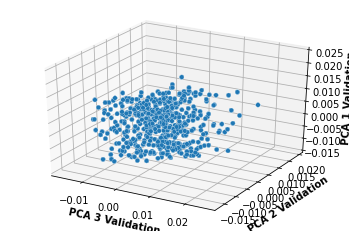

In [30]:
ax = plt.axes(projection ='3d')
x = pca3_dataset_valid.PCA1_Validation
y = pca3_dataset_valid.PCA2_Validation
z = pca3_dataset_valid.PCA3_Validation
ax.scatter(x, y, z, edgecolors="w", linewidths=0.25, alpha=1) 
ax.set_xlabel("PCA 3 Validation", weight="bold")
ax.set_ylabel("PCA 2 Validation", weight="bold")
ax.set_zlabel("PCA 1 Validation", weight="bold")

plt.savefig('PCA1vsPCA2vsPCA3_Validation', dpi=300)